<a href="https://colab.research.google.com/github/frnndfrs/MiniCase2/blob/main/MINICASE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MINI CASE 2




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#For implementing linear regression
import statsmodels.api as sm

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


First few rows of the dataset using head ()

In [ ]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Use the info() function to get an overview of the dataset, including column names, data types, and missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Summary statistics of the dataset using the describe() function.

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#Section of markdown
Histogram exploration

Create a histogram of a numerical variable (weight)

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

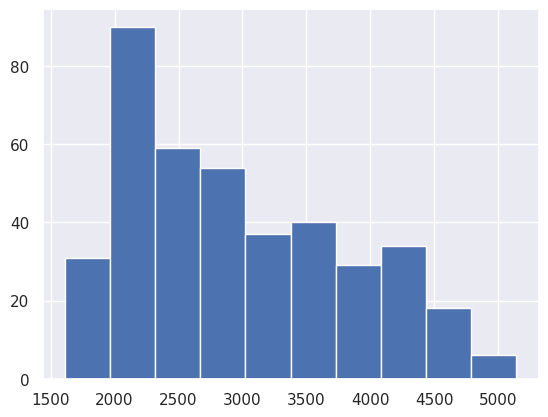

In [ ]:
plt.hist(df['weight'])

Create a scatter plot of two numerical variable (weight & displacement )

<Axes: xlabel='weight', ylabel='displacement'>

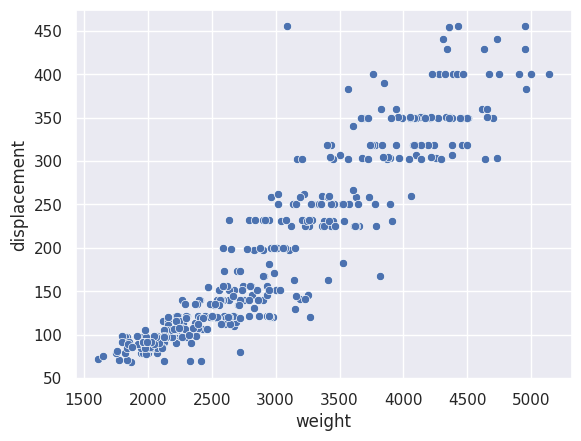

In [ ]:
sns.scatterplot(data=df, x='weight', y='displacement')

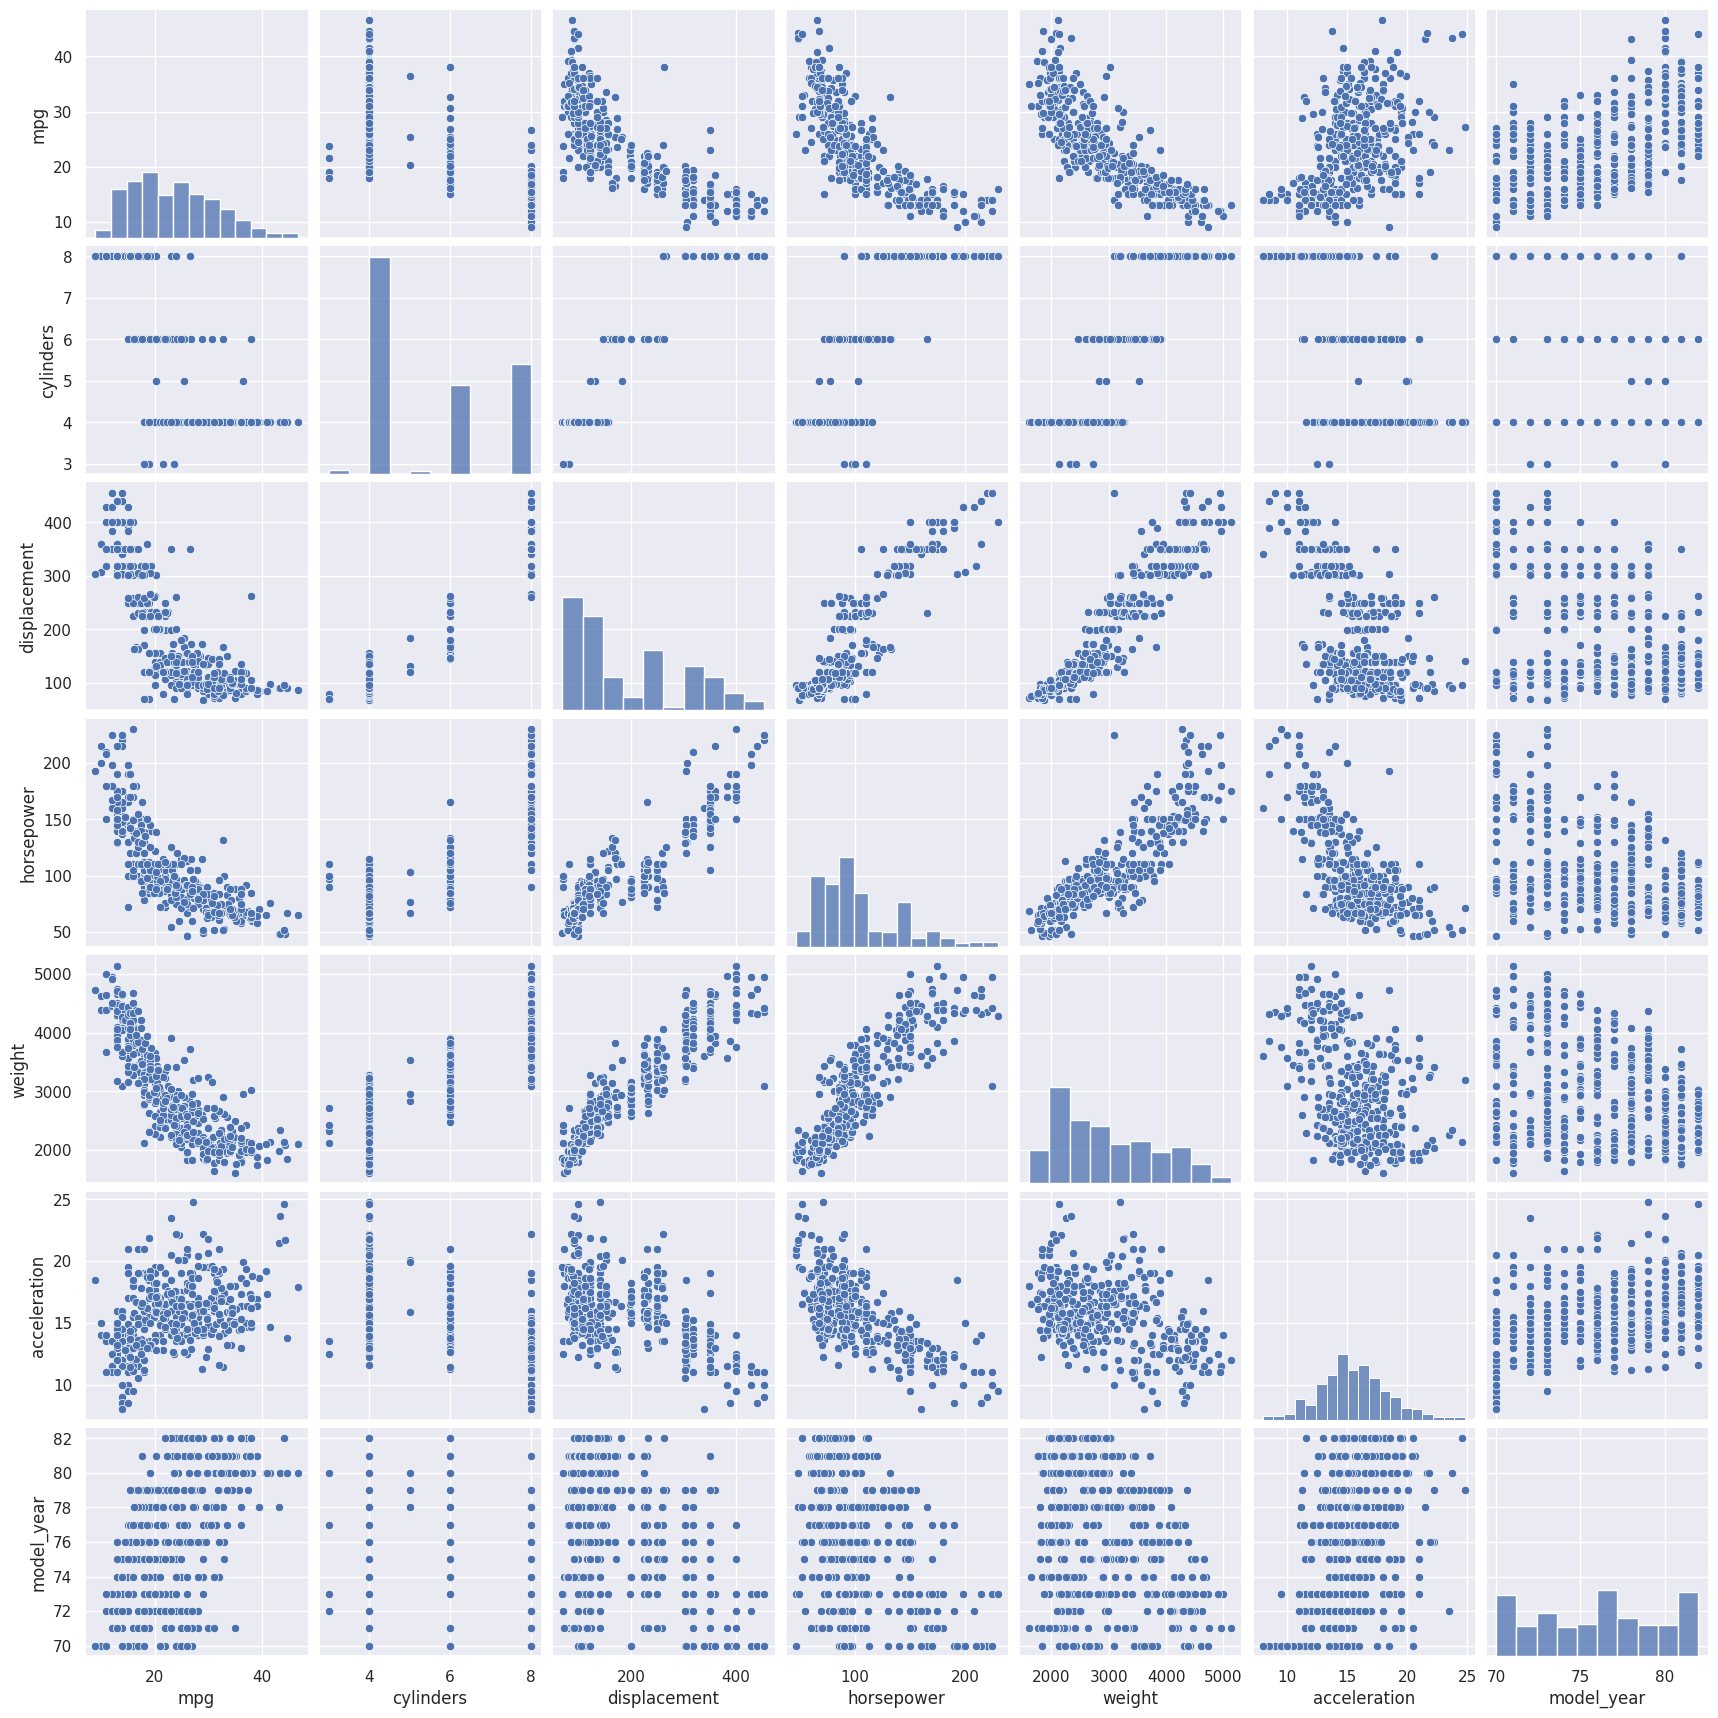

In [ ]:
sns.pairplot(df)

Candidates for linear regression:
1. weight
2. displacement



Correlation matrix

In [ ]:
df.corr()
corr_matrix = df.corr()
corr_matrix

<ipython-input-30-ae6f19968988>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-30-ae6f19968988>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<ipython-input-31-ab4f0a403475>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True, cmap = 'winter')


Text(0.5, 1.0, 'MPG Heatmap')

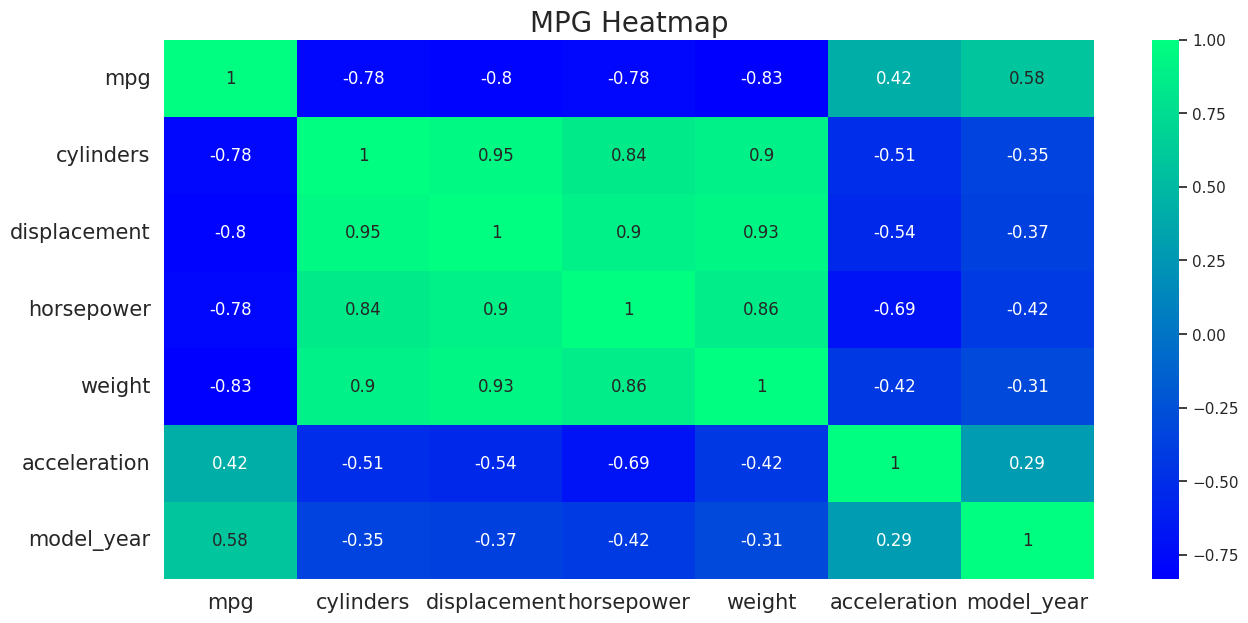

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(data = df.corr(), annot = True, cmap = 'winter')
plt.xticks(fontsize = 15, ha = 'center')
plt.yticks(fontsize = 15, va = 'center')

sns.set(font_scale =1)

ax.set_title('MPG Heatmap', size = 20)

Two numerical variables that seem to exhibit a linear relationship =
weight & displacement

#Linear Regression Part

Independent variable (X) and one dependent variable (y) from the identified candidates for linear regression

In [ ]:
X= df['weight']
y = df['displacement']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


<Axes: xlabel='weight', ylabel='displacement'>

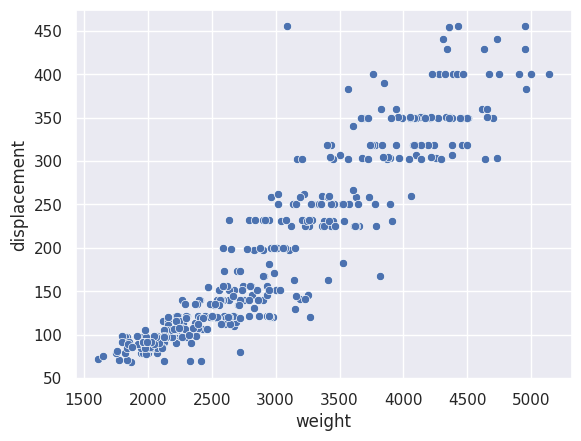

In [ ]:
sns.scatterplot( x=X, y=y)

 Instance of the linear regression model using statsmodels LinearRegression() class. Assign it to a variable, such as model.

In [ ]:
serie1 = pd.Series(np.random.uniform(3000,3500,50))
serie2= pd.Series (np.random.uniform(4500,5000,50))

X_test = pd.concat([serie1,serie2], ignore_index=True)

Fit the model to the training data using the fit() method, passing in X_train and y_train as arguments.

In [ ]:
model= sm.OLS(y,X).fit()
y_pred=model.predict(X_test)

Use the model to make predictions on the test data using the predict() method, passing in X_test as an argument.



In [ ]:
X_test

0     3173.595566
1     3403.864223
2     3263.716538
3     3274.227316
4     3201.206373
         ...     
95    4725.399705
96    4748.087381
97    4753.580033
98    4854.361522
99    4983.984568
Length: 100, dtype: float64

In [ ]:
y_pred

0     218.493647
1     234.347034
2     224.698237
3     225.421876
4     220.394578
         ...    
95    325.331250
96    326.893237
97    327.271391
98    334.209930
99    343.134133
Length: 100, dtype: float64

Text(0.5, 1.0, 'Prediction')

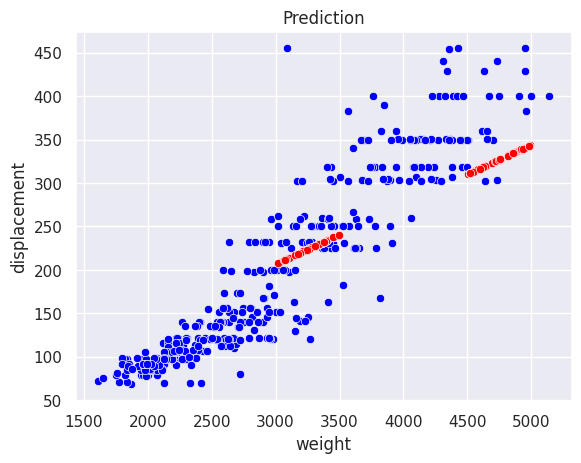

In [ ]:
sns.scatterplot(x=X, y=y, color='blue')
sns.scatterplot(x=X_test, y=y_pred, color='red')
plt.title('Prediction')

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           displacement   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              5895.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                   2.65e-240
Time:                        16:15:51   Log-Likelihood:                         -2161.0
No. Observations:                 398   AIC:                                      4324.
Df Residuals:                     397   BIC:                                      4328.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight         0.0688      0.001     76.776      0.000       0.067       0.071
==============================================================================
Omnibus:                       61.848   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.512
Skew:                           1.055   Prob(JB):                     9.93e-20
Kurtosis:                       3.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""